In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch as t
import torch.nn as nn
import torch.nn.functional as F
from beartype import beartype as typed
from beartype.door import die_if_unbearable as assert_type
from datasets import load_dataset
from jaxtyping import Float, Int, Bool
from typing import Callable
from torch import Tensor as TT
from transformers import AutoModelForCausalLM, AutoTokenizer
from einops import einops as ein

%load_ext autoreload
%autoreload 2

In [3]:
model_name = "roneneldan/TinyStories-8M"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [51]:
from utils import get_activations

prompt = "repeat with me, repeat with me, repeat with me, repeat with me, repeat with me"
_, activations = get_activations(model, tokenizer, prompt)

Layer 0


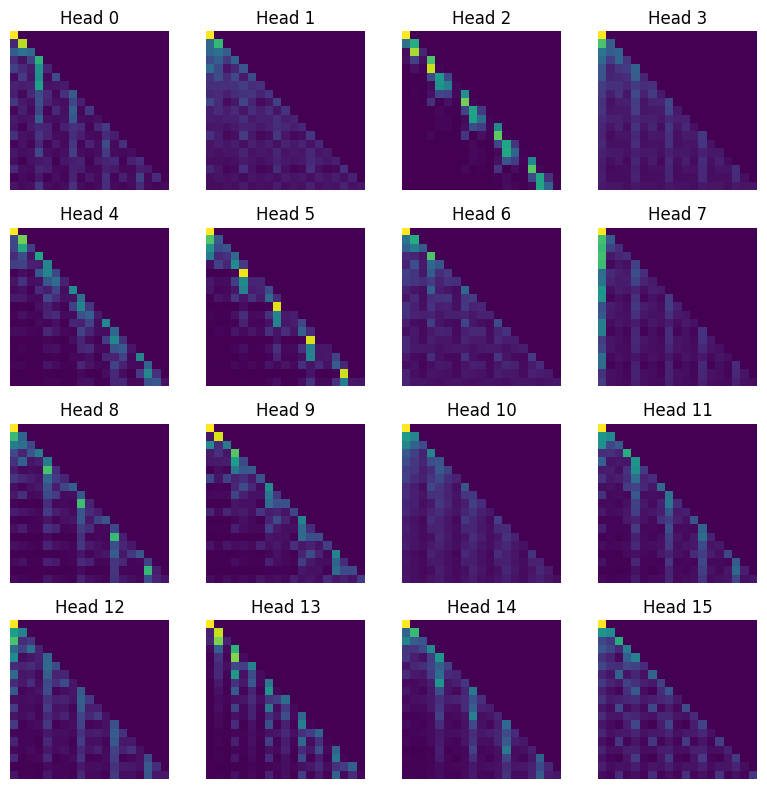

Layer 1


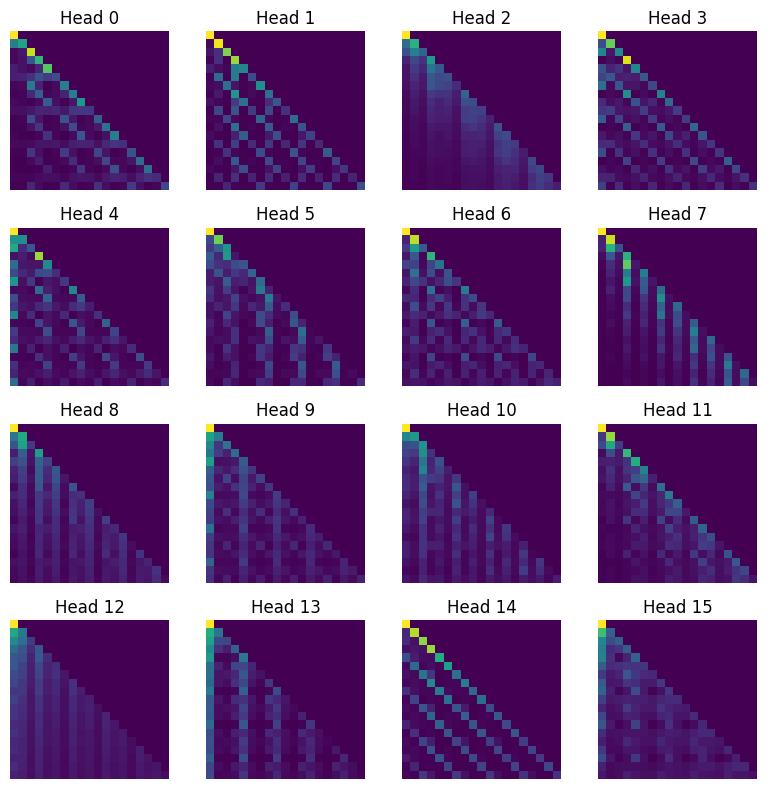

Layer 2


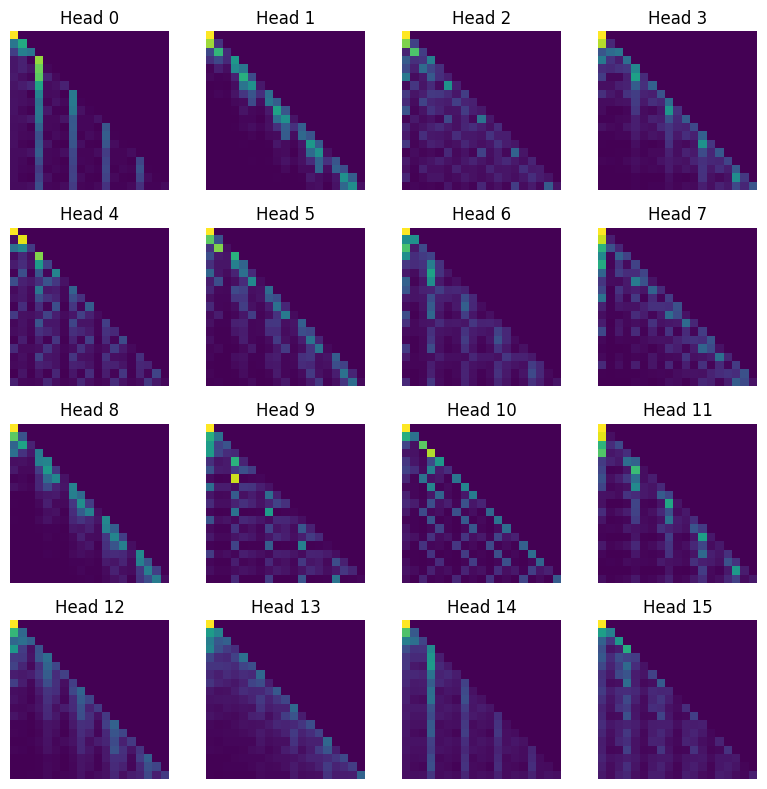

Layer 3


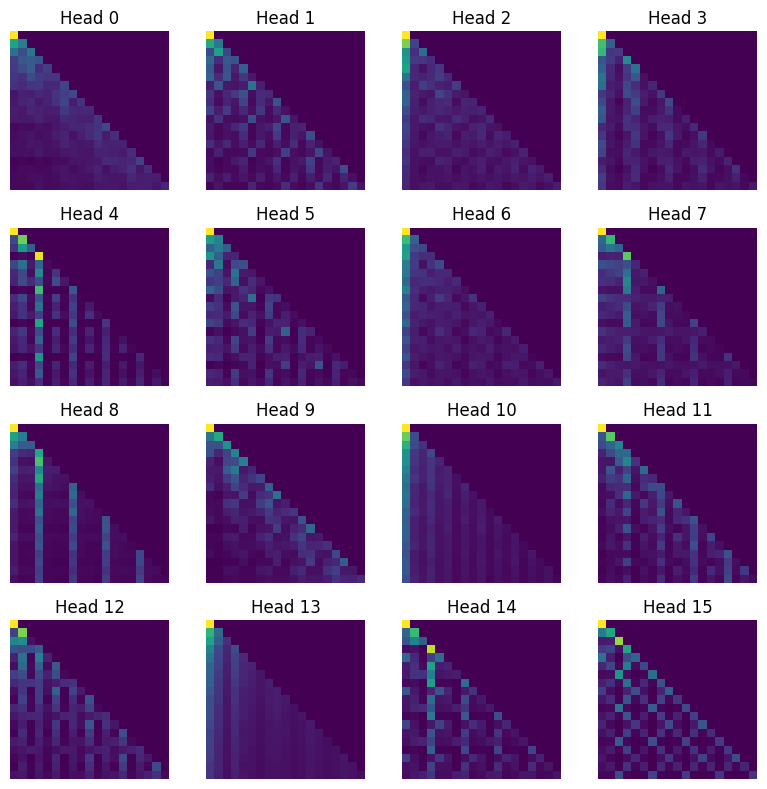

Layer 4


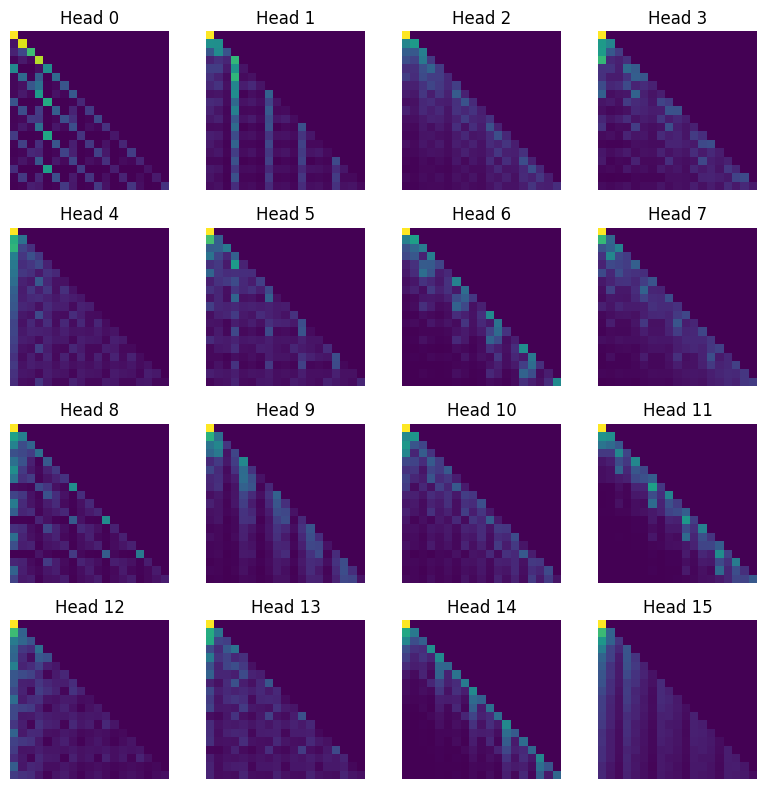

Layer 5


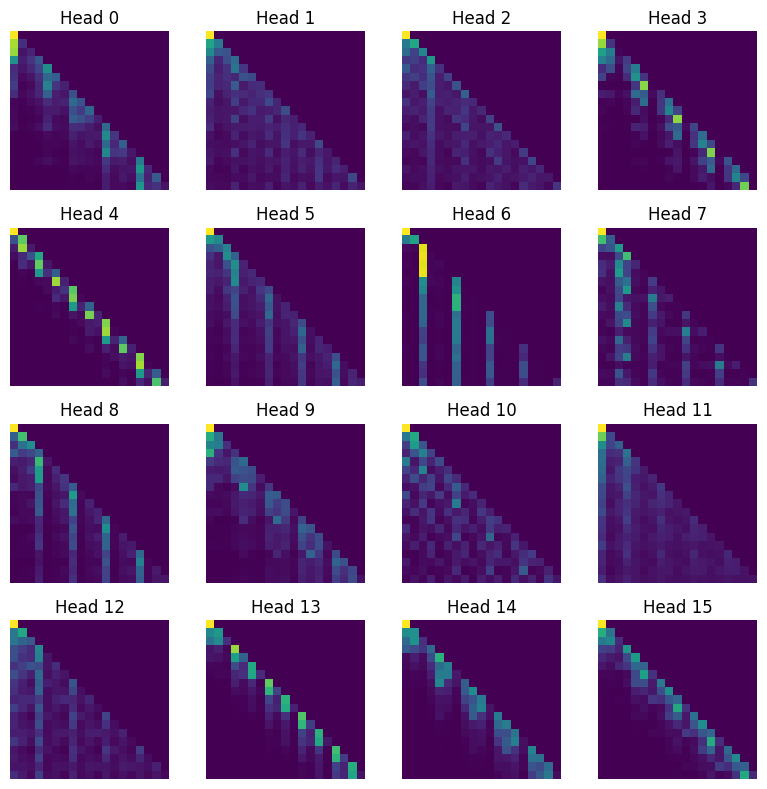

Layer 6


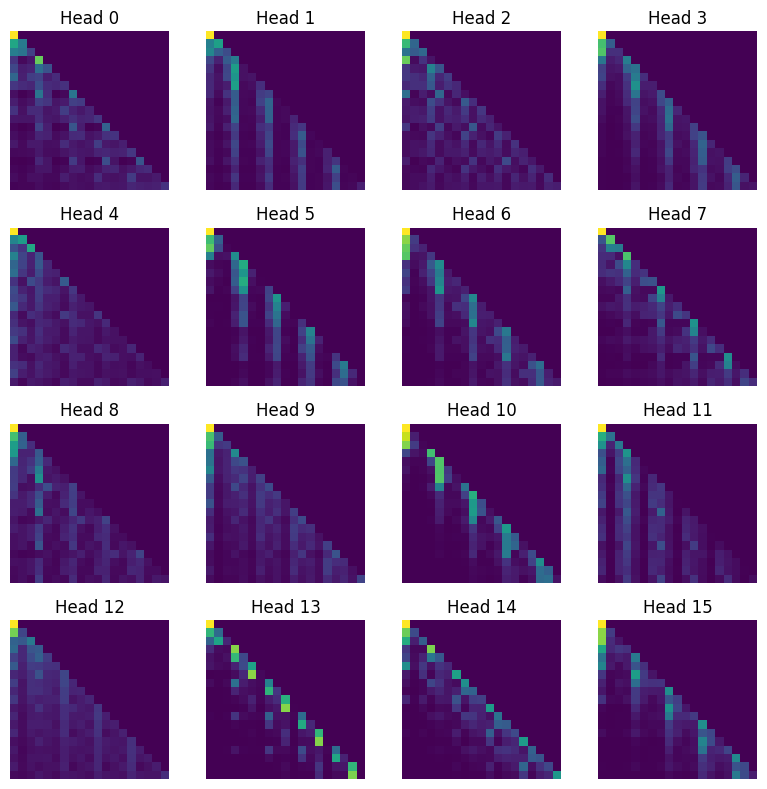

Layer 7


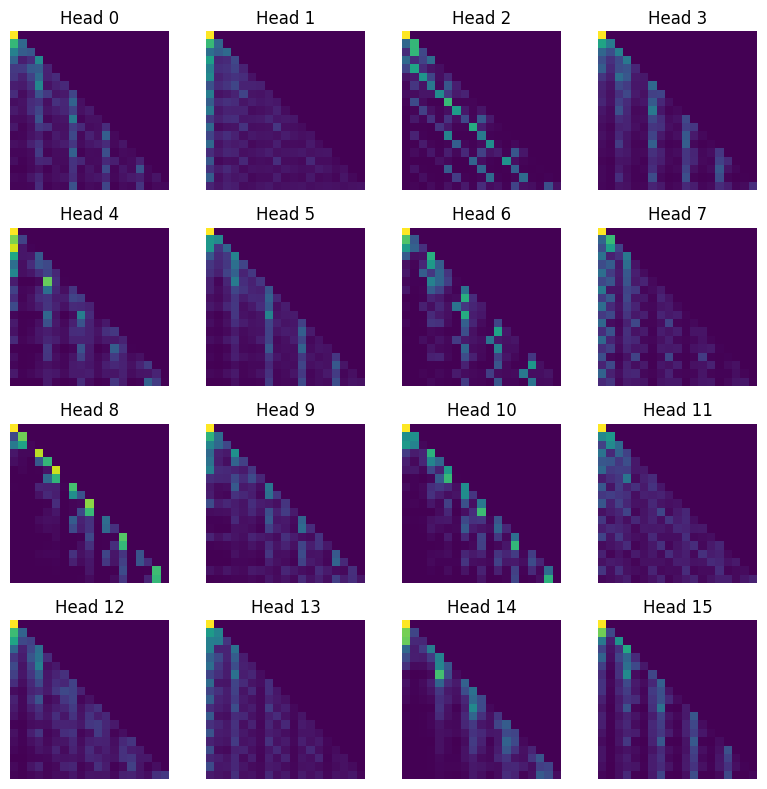

In [53]:
from utils import show_patterns

for i in range(8):
    print("Layer", i)
    show_patterns(model, tokenizer, prompt, layer=i)